In [1]:
import  cv2
import  numpy as np
import  matplotlib.pyplot as plt
from skimage import io 

In [2]:
arr1=cv2.imread(r'Lena.tiff')
arr1=cv2.cvtColor(arr1, cv2.COLOR_BGR2GRAY)

arr2=cv2.imread(r'Pepper.tiff')
arr2=cv2.cvtColor(arr2, cv2.COLOR_BGR2GRAY)

arr3=arr1.copy()

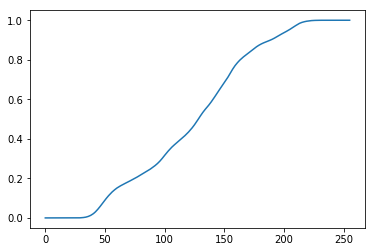

In [3]:
f1 = {}
for i in range(256):
    f1[i] = 0
pd1 = f1 
cdf1= f1
rows1, columns1 = arr1.shape

for i in range(rows1):
    for j in range(columns1):
        f1[arr1[i][j]]=f1[arr1[i][j]] + 1  

for i in range(256):
    pd1[i]=f1[i]/(rows1*columns1)
    
cdf1[0]=pd1[0]
for i in range(1,256):
    cdf1[i]=(cdf1[i-1]+pd1[i])
       
plt.plot(cdf1.keys(),cdf1.values())

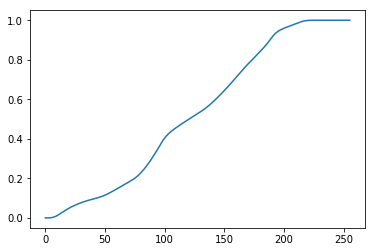

In [4]:
f2 = {}
for i in range(256):
    f2[i] = 0
pd2= f2
cdf2 =f2
rows2, columns2 = arr2.shape
for i in range(rows2):
    for j in range(columns2):
        f2[arr2[i][j]]=f2[arr2[i][j]] + 1

for i in range(256):
        pd2[i]=f2[i]/(rows2*columns2)

cdf2[0]=pd2[0]
for i in range(1,256):
    cdf2[i]=(cdf2[i-1]+pd2[i])

plt.plot(cdf2.keys(),cdf2.values())

In [5]:
for i in range(rows2):
    for j in range(columns2):
        for k in range(256):
            if cdf1[arr1[i][j]]<=cdf2[k]:
                arr3[i][j]=k-1
                break;

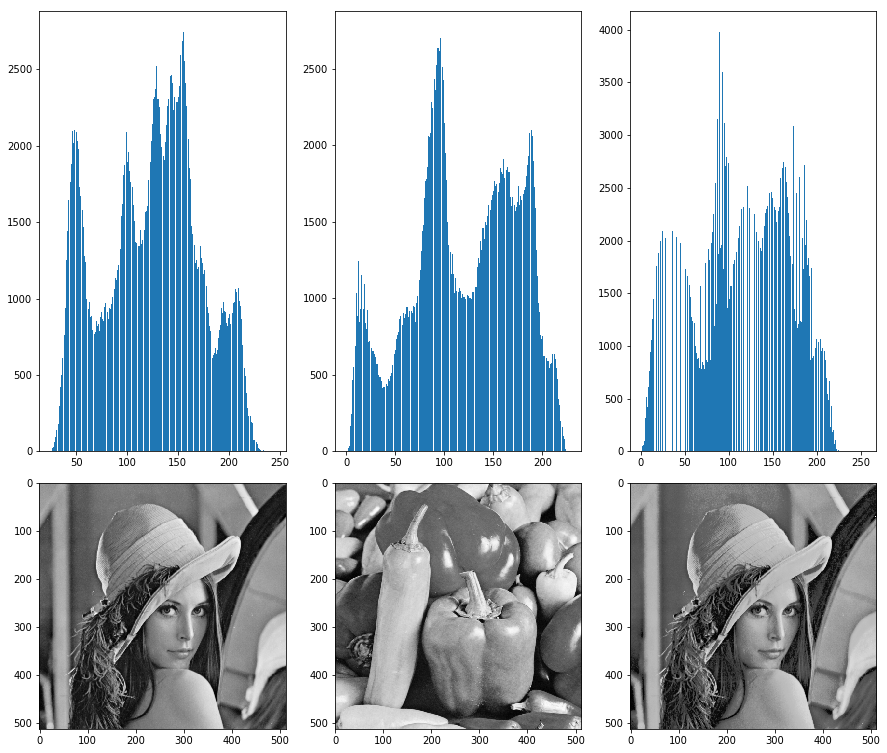

In [6]:
fig=plt.figure(figsize=(15,15))
    
ax1=fig.add_subplot(2,3,1)
ax1.hist(arr1.ravel(),bins =256)
  
ax2=fig.add_subplot(2,3,2)
ax2.hist(arr2.ravel(), bins=256)   
    
ax3=fig.add_subplot(2,3,3)
ax3.hist(arr3.ravel(), bins=256)
    
ax4=fig.add_subplot(2,3,4)
ax4.imshow(arr1,cmap='gray')

ax5=fig.add_subplot(2,3,5)
ax5.imshow(arr2,cmap='gray')

ax6=fig.add_subplot(2,3,6)
ax6.imshow(arr3,cmap='gray')

plt.subplots_adjust(hspace=-0.15)
plt.show()